# Predictive Analytics
- Machine Learning 
    - Supervised Learning 
    - Unsupervised Machine Learning 

# Supervised Learning 
- Regression 
- Classification 
  

# Unsupervised Learning 
- Clustering 

#### What is Machine Learning ?
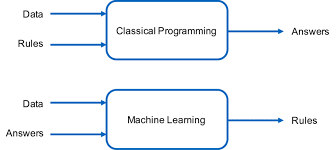

# Regression Algorithm 
    - Simple Linear Regression     y= m1x1 + c
    - Multiple Linear Regression   y = m1x1 + m2x2 +.... + c
    - Polynomial Rgression         

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step1: Load Data
### Step2: Separate input and output features 
### Step3: Break the data into training data and testing data 
### Step4: Selecting the algorithm /model
### Step5: Training the model 
### Step6: Evaluating the model 
### Step7: Predict using model 
### Step8: Study model performance Error

In [2]:
# step1
data1 = pd.read_csv('data/weight-height.csv')

In [3]:
data1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
data = data1[['Height', 'Weight']]
data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


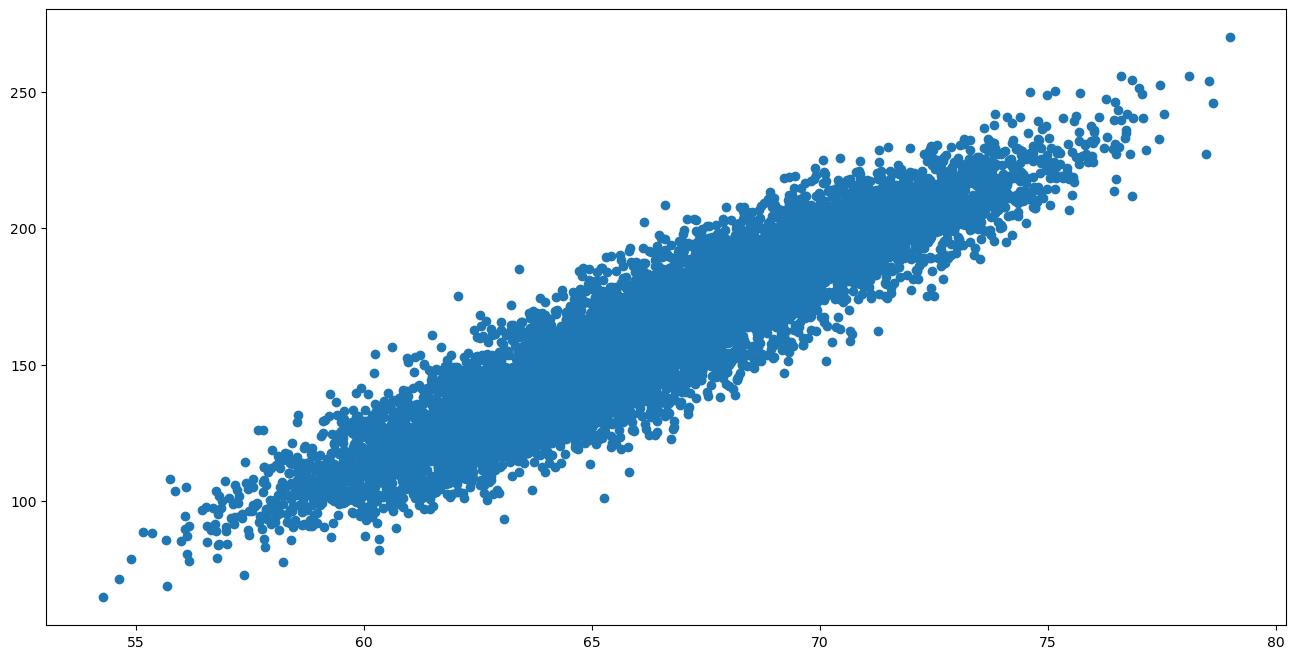

In [5]:
plt.figure(figsize=(16,8))
plt.scatter(data.Height, data.Weight)

In [6]:
# step2 : separate input and target
X  = data[['Height']]
y = data['Weight']

In [7]:
# step3: break data into training and testing: 30% test 70% training

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [10]:
y_train

2967    187.779075
700     187.812062
3481    214.787698
1621    210.821194
800     204.937760
           ...    
9225     97.263881
4859    174.156893
3264    162.475957
9845    136.783022
2732    188.450674
Name: Weight, Length: 7500, dtype: float64

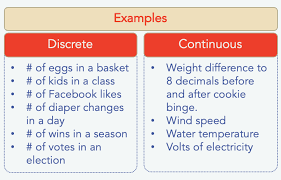

# Whenever the target value is continuous. (height, weight, age,salary, distance )
# Whenever the target value is discrete. (male, famale, A, B , 8 10 )


In [11]:
#Model Selection
from sklearn.linear_model import LinearRegression

In [12]:
height_weight_regressor = LinearRegression()

In [13]:
#Step5 Train the model using fit
height_weight_regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
# Evaluate/Predict model on training data

y_pred_train = height_weight_regressor.predict(X_train)

In [15]:
y_pred_train

array([174.45953315, 187.59041579, 202.58147611, ..., 169.89219802,
       128.67931519, 194.05012241])

In [16]:
pd.DataFrame({'y_train':y_train ,"y_pred_train":y_pred_train })

,y_train,y_pred_train
2967,187.779075,174.459533
700,187.812062,187.590416
3481,214.787698,202.581476
1621,210.821194,197.902257
800,204.937760,206.538474
...,...,...
9225,97.263881,115.510093
4859,174.156893,164.208944
3264,162.475957,169.892198
9845,136.783022,128.679315


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_train,y_pred_train)

148.5696166325645

In [19]:
from sklearn.metrics  import r2_score

In [20]:
r2_score(y_train,y_pred_train)

0.85534320254092

In [21]:
height_weight_regressor.coef_

array([7.71833809])

In [22]:
height_weight_regressor.intercept_

-350.8415809477557

# y = (7.712)x + (-350.49)

In [23]:
y_pred_test = height_weight_regressor.predict(X_test)

In [24]:
mean_squared_error(y_test,y_pred_test)

151.4699602590275

In [25]:
r2_score(y_test,y_pred_test)

0.854657415652197

In [26]:
user_height = float(input("Ernter your height, i will tell you your weight"))
print(f"your according to your height {user_height} your weight is {height_weight_regressor.predict([[user_height]])}")

Ernter your height, i will tell you your weight160
your according to your height 160.0 your weight is [884.09251336]


C:\Users\Shoaib\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
y = (7.712)*(80) + (-350.49)


In [28]:
y

266.47

In [29]:
data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [30]:
data1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [31]:
data1.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

### Since our gender data is non numeric we will have to encode it to numerical form. 
### For this we can use label encoder , one hot encode or do it manually by replacing male with 1 and femail with 0

In [32]:
data1.Gender = data1.Gender.apply(lambda x : 1 if x=='Male' else 0)

In [33]:
data1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [34]:
data1.tail()

,Gender,Height,Weight
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


In [35]:
data1.sample(10)

,Gender,Height,Weight
2909,1,72.117757,184.683527
4006,1,66.392306,188.191996
7011,0,62.867978,122.781816
1255,1,65.206533,163.633597
1601,1,69.230768,175.911589
5535,0,67.013413,166.436636
8299,0,64.523274,146.602980
1196,1,66.887819,187.581627
2212,1,69.123058,179.024645
9343,0,62.191317,117.108724


In [36]:
X  = data1[['Gender','Height']]
y = data1['Weight']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [38]:
mul_reg = LinearRegression()

In [39]:
mul_reg.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred_train = mul_reg.predict(X_train)

In [41]:
mean_squared_error(y_train,y_pred_train)

99.53818508709487

In [42]:
r2_score(y_train,y_pred_train)

0.9030833126856689

In [43]:
y_pred_test= mul_reg.predict(X_test)
print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

102.3964688391935
0.9017457495616483


In [44]:
user_height = float(input("Ernter your height, i will tell you your weight"))
user_gender = int(input("Enter your gender for male input 1 and for female input 0"))
print(f"your according to your height {user_height} your weight is {mul_reg.predict([[user_gender,user_height]])}")

Ernter your height, i will tell you your weight160
Enter your gender for male input 1 and for female input 01
your according to your height 160.0 your weight is [729.92716672]


C:\Users\Shoaib\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
